# Capstone Project: Predict housing prices with Linear Regression


## Objective
The goal of this project is to demonstrate Linear Regression method we've learnt over this course to produce the best possible model. The problem statement at hand is to predict housing prices in King County, WA area using the sale prices between May 2014 and May 2015. 

### Data description

| Column        | Type        | Description                      | 
| -----------   | ----------- | -------------------------------- |
| id            | discrete    | Id of the sale                   |
| date          | discrete    | Date of the sale                 |
| price         | continuous  | Price of the sale                | 
| bedrooms      | discrete    | # of bedrooms                    |
| bathrooms     | discrete    | # of bathrooms                   | 
| sqft_living   | continuous  | Sqft of the living space         |
| sqft_lot      | coninuous   | Sqft of the lot                  |
| floors        | discrete    | # of floors                      |
| waterfront    | discrete    | If waterfront property           |
| view          | discrete    | View category of the house       |
| condition     | discrete    | Condition of the house           |
| grade         | discrete    | Grade given to house             |
| sqft_above    | continuous  | Sqft of the house above basement |
| sqft_basement | continuous  | Sqft of the basement             |
| yr_built      | discrete    | Year built                       |
| yr_renovated  | discrete    | Year renovation                  |
| zipcode       | discrete    | Zipcode                          |
| lat           | continuous  | Lattitude                        |
| long          | continuous  | Longitude                        |
| sqft_living15 | continuous  | Sqft of living space in 2015     |
| sqft_lot15    | continuous  | Sqft of lot in 2015              |

### Imports

In [1]:
# Importing everything required for this project in this cell
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

#### Read the housing data

In [2]:
path = './kc_house_data.csv'
housing_df = pd.read_csv(path)

### EDA

In [3]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(housing_df.tail())
print(housing_df.info())
print(housing_df.shape)
housing_df.dtypes

               id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609   

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Clean data

In [5]:
print(housing_df.isnull().any())
print(housing_df.isna().sum())
housing_df.duplicated()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

We see no duplicated or null values. We're good to continue to Exploratory Data Analysis.

### EDA continued

In [6]:
# Generate summary statistics
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Target in this data-set is price of the houses.

In [7]:
housing_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
housing_df['price'].value_counts(normalize=True)

450000.0     0.007958
350000.0     0.007958
550000.0     0.007357
500000.0     0.007033
425000.0     0.006940
               ...   
1234000.0    0.000046
575950.0     0.000046
576250.0     0.000046
411715.0     0.000046
897000.0     0.000046
Name: price, Length: 4028, dtype: float64

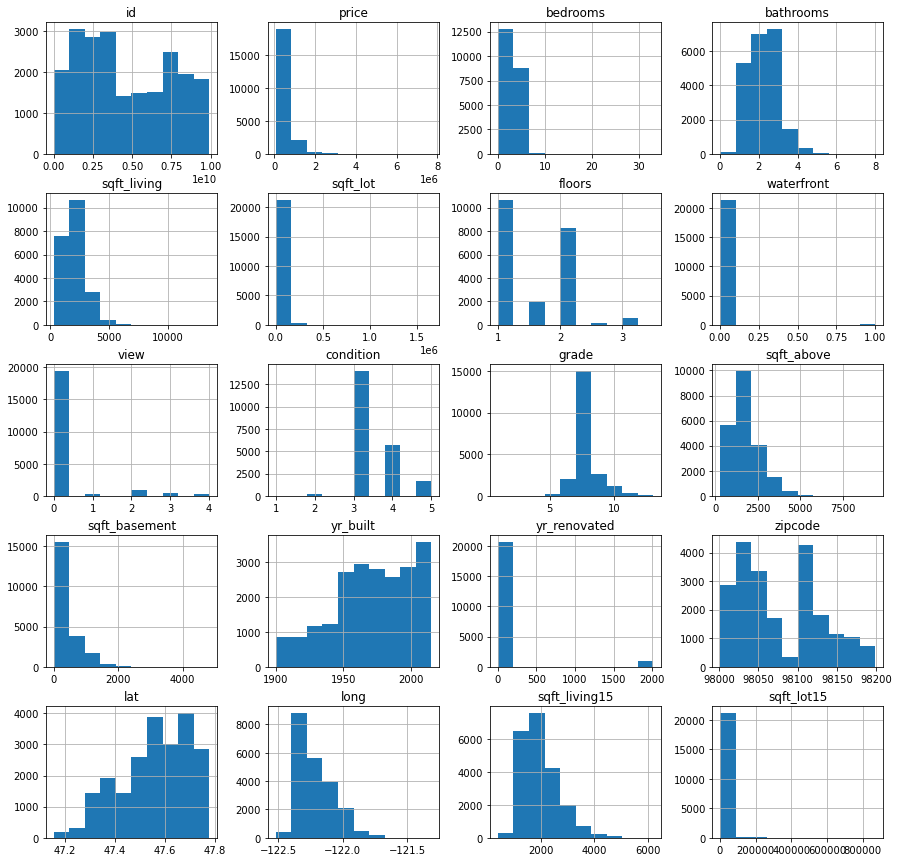

In [9]:
# Visualize data
housing_df.hist(figsize=[15,15])
plt.show()

In [10]:
data_headers = housing_df.columns.tolist()
feature_cols = housing_df.columns.tolist()
data_headers

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
# get the correlation matrix
feature_cols.remove('id')
corr = housing_df[feature_cols].corr()
corr.head().T

,price,bedrooms,bathrooms,sqft_living,sqft_lot
price,1.000000,0.308350,0.525138,0.702035,0.089661
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000
floors,0.256794,0.175429,0.500653,0.353949,-0.005201
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604
view,0.397293,0.079532,0.187737,0.284611,0.074710
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958
grade,0.667434,0.356967,0.664983,0.762704,0.113621


<AxesSubplot:>

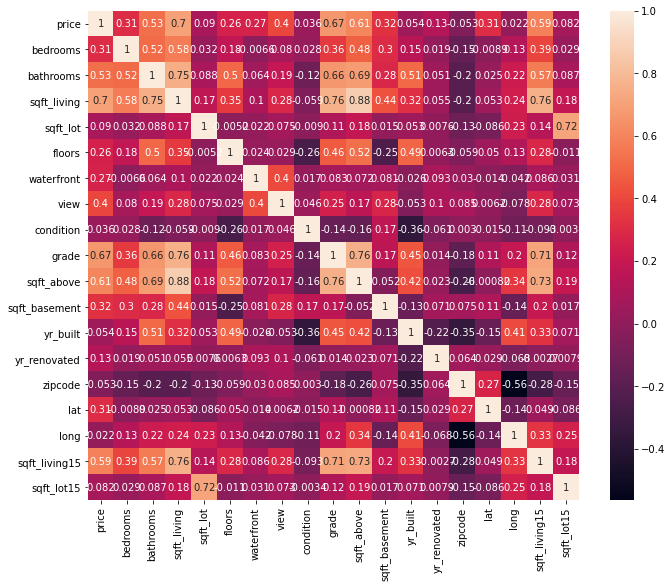

In [12]:
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)

In [13]:
# Compute the correlation matrix for all features 
df_corr = housing_df[data_headers].corr()

abs_corr = df_corr.abs()

is_not_1 = abs_corr < 1.0

# list the 10 highest pairwise correlations 
print(abs_corr[is_not_1].unstack().sort_values(ascending=False)[:20])

sqft_above     sqft_living      0.876597
sqft_living    sqft_above       0.876597
grade          sqft_living      0.762704
sqft_living    grade            0.762704
               sqft_living15    0.756420
sqft_living15  sqft_living      0.756420
grade          sqft_above       0.755923
sqft_above     grade            0.755923
sqft_living    bathrooms        0.754665
bathrooms      sqft_living      0.754665
sqft_living15  sqft_above       0.731870
sqft_above     sqft_living15    0.731870
sqft_lot       sqft_lot15       0.718557
sqft_lot15     sqft_lot         0.718557
sqft_living15  grade            0.713202
grade          sqft_living15    0.713202
sqft_living    price            0.702035
price          sqft_living      0.702035
bathrooms      sqft_above       0.685342
sqft_above     bathrooms        0.685342
dtype: float64


In [14]:
# List feature-price correlations in descending order and > 0.5.
price_corr = housing_df[feature_cols].corr()
print("Feature - Housing Correlations (descending):")
print(price_corr['price'][price_corr['price'] > 0.5].sort_values(ascending=False))

Feature - Housing Correlations (descending):
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
Name: price, dtype: float64


In [15]:
features_num_df = housing_df.drop(['id', 'date', 'grade', 'price', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis = 1)

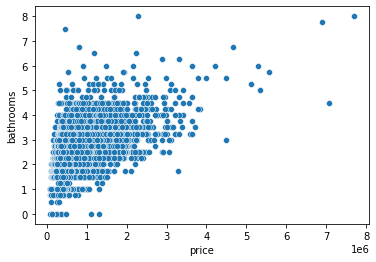

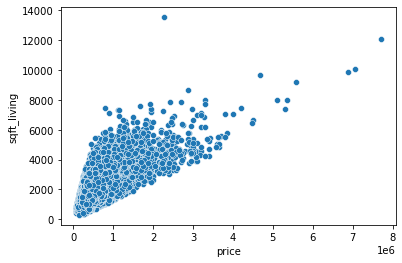

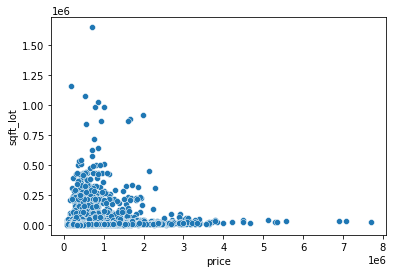

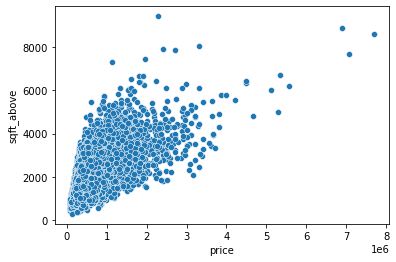

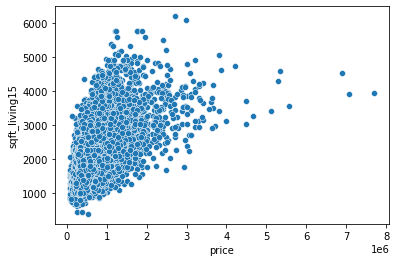

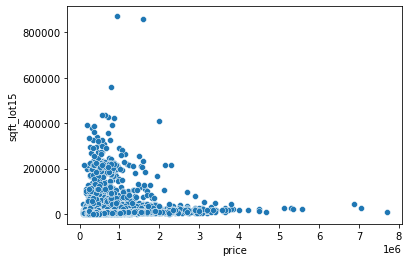

In [16]:
# Scatter plots for all number features against target
for col in features_num_df.columns:
    scatterplot = sns.scatterplot(x=housing_df['price'], y=features_num_df[col])
    plt.show()

#### EDA for category cols

In [17]:
category_cols = ['floors', 'waterfront', 'grade', 'view', 'condition']

##### Visualize Categorical data

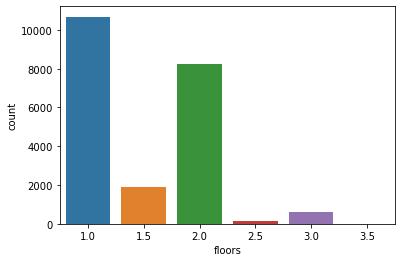

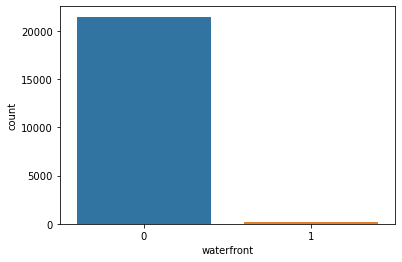

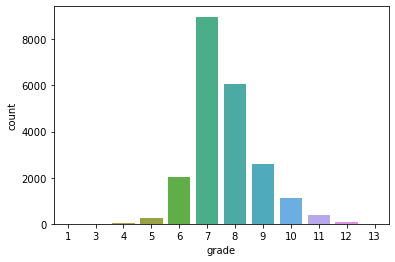

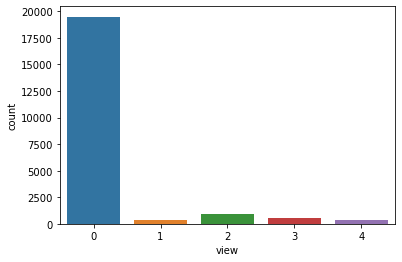

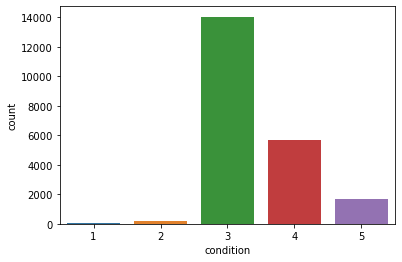

In [18]:
for col in category_cols:
    countplot = sns.countplot(x=housing_df[col] )
    plt.show()

Observations:
Majority of the houses have upto 2 floors and are not waterfront properties

##### Correlation between categorical features and target

Using boxplot for analyzing relation between category values and target.

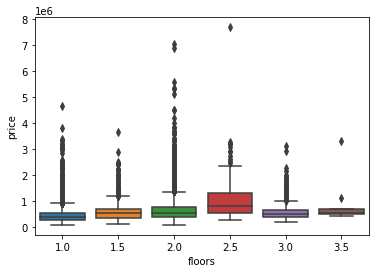

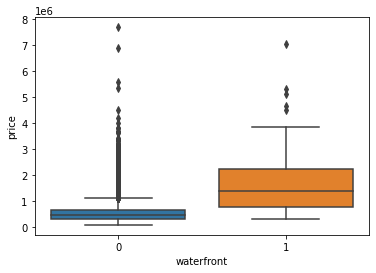

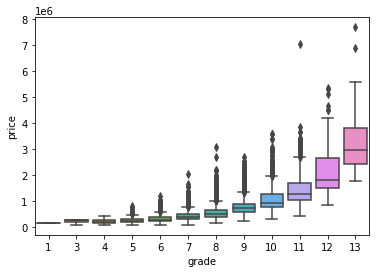

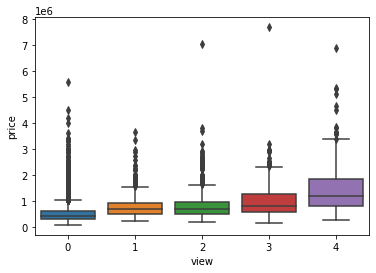

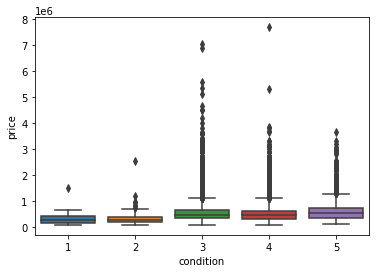

In [19]:
# Box plots for all category features against target
for col in category_cols:
    boxplot = sns.boxplot(x=col, y='price', data=housing_df)
    plt.show()

Observations:
Price of houses is similar for all values of condition, views and floors of the house. Waterfront properties are more expensive and the house of the price goes up with the grade value assigned by KCC. House prices go up if the property is waterfront but there's less waterfront properties overall.

Based on the correlation and relation to price we saw above, we're going to pick a handful of features and not all of them for modeling this dataset.

In [20]:
feature_cols = ['sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15']

In [21]:
# create a df with just the subset features
housing_features_df = housing_df[feature_cols].copy(deep=True)
housing_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   grade          21613 non-null  int64  
 3   sqft_above     21613 non-null  int64  
 4   sqft_living15  21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   sqft_lot15     21613 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


In [22]:
housing_features_df = housing_features_df.reset_index().drop('index', axis=1)
housing_features_df.describe()

,sqft_living,bathrooms,grade,sqft_above,sqft_living15,sqft_lot,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,2079.899736,2.114757,7.656873,1788.390691,1986.552492,1.510697e+04,12768.455652
std,918.440897,0.770163,1.175459,828.090978,685.391304,4.142051e+04,27304.179631
min,290.000000,0.000000,1.000000,290.000000,399.000000,5.200000e+02,651.000000
25%,1427.000000,1.750000,7.000000,1190.000000,1490.000000,5.040000e+03,5100.000000
50%,1910.000000,2.250000,7.000000,1560.000000,1840.000000,7.618000e+03,7620.000000
75%,2550.000000,2.500000,8.000000,2210.000000,2360.000000,1.068800e+04,10083.000000
max,13540.000000,8.000000,13.000000,9410.000000,6210.000000,1.651359e+06,871200.000000


##### Check if data is normally distributed

<AxesSubplot:ylabel='Frequency'>

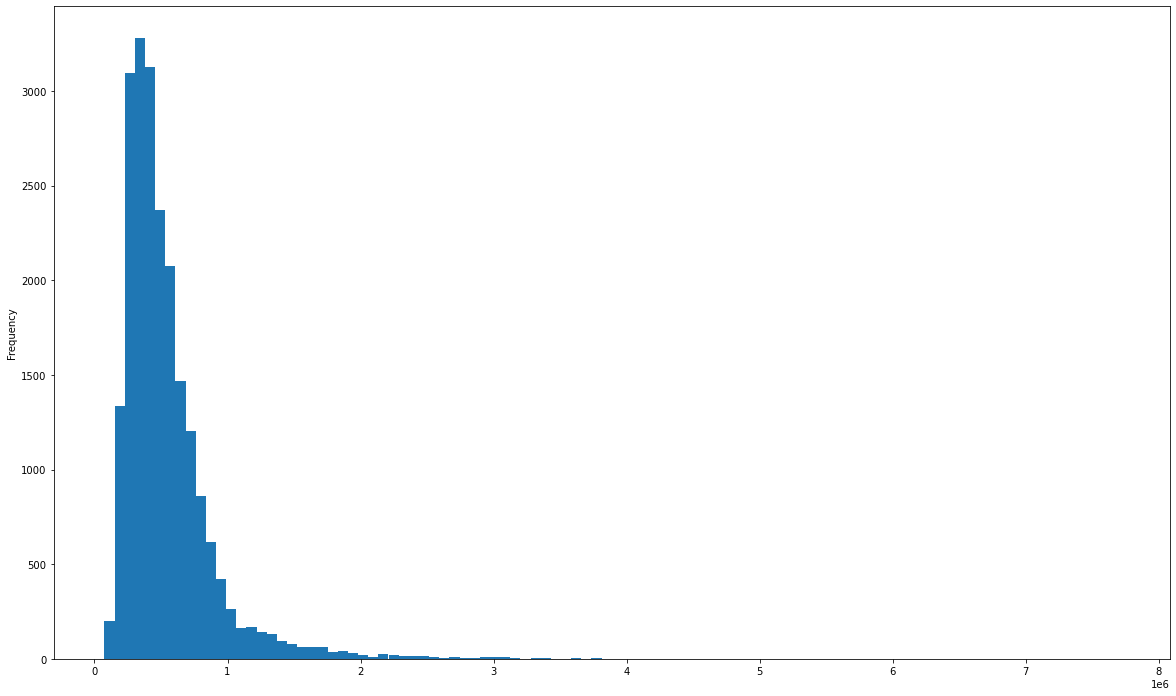

In [23]:
housing_df['price'].plot(kind='hist', figsize=(20, 12), bins=100)

Price data is not normalized so, we will log-normalize the price data. 

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          

<AxesSubplot:ylabel='Frequency'>

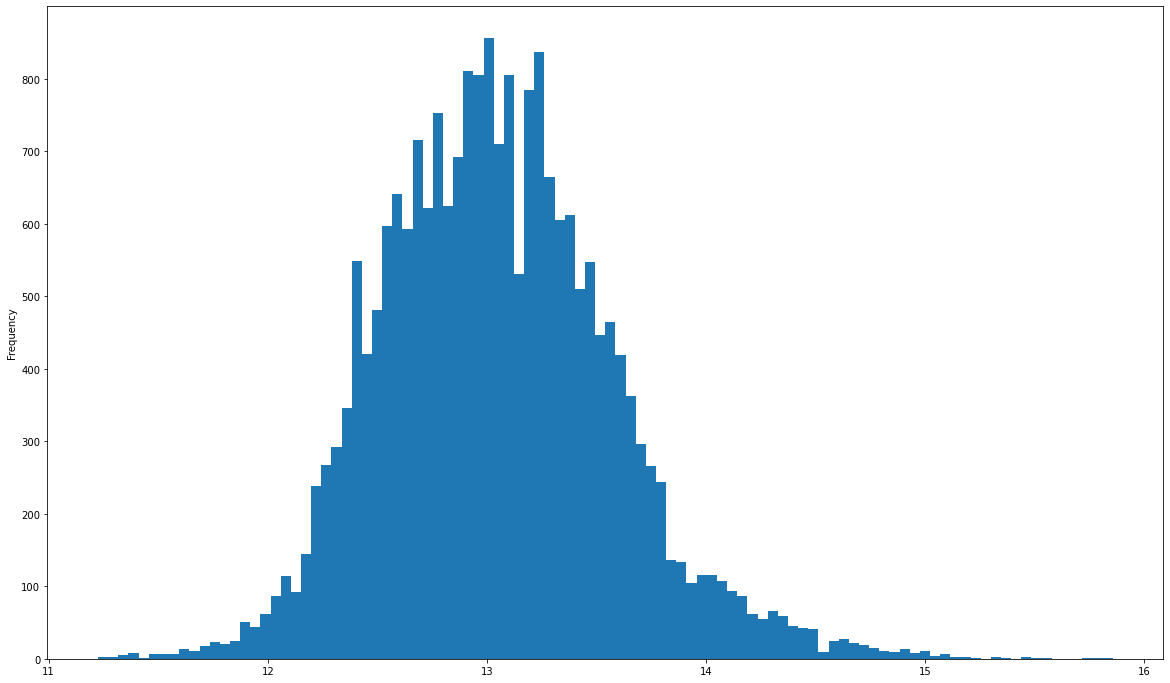

In [24]:
housing_df['log_price'] = np.log(housing_df['price'])
print(housing_df.head())
housing_df['log_price'].plot(kind='hist', figsize=(20, 12), bins=100)

In [25]:
# define features and target
lr = LinearRegression()

X = housing_features_df
y = housing_df['log_price']

y_orig = housing_df['price']
lr.fit(X,y)

LinearRegression()

In [26]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.coef_

array([ 2.83613882e-04, -7.70200976e-03,  1.86905401e-01, -1.42271064e-04,
        9.54660086e-05,  3.35678701e-07, -9.03273390e-07])

In [28]:
## Take a look at our coefficients
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
sqft_living,2.836139e-04
bathrooms,-7.702010e-03
grade,1.869054e-01
sqft_above,-1.422711e-04
sqft_living15,9.546601e-05
sqft_lot,3.356787e-07
sqft_lot15,-9.032734e-07


In [29]:
y_hat = lr.predict(X_test)

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
compare_df.head(10)

,Actual,Predicted
17384,12.601487,12.751356
722,14.271669,14.378894
2680,13.239435,12.791940
18754,13.355853,12.922508
14554,13.567049,13.451610
16227,13.091904,12.797593
6631,12.736701,12.809696
19813,12.723693,13.194143
3367,12.959844,13.359512
21372,13.102161,13.992124


### Evaluate the Model

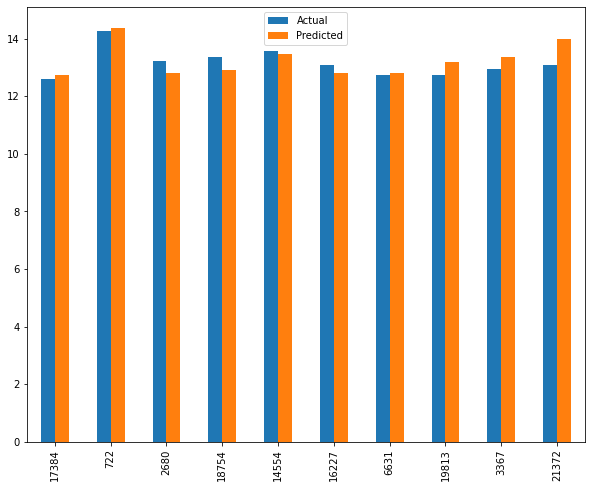

In [30]:
# plot the actual & predicted values for log_Price
compare_df.head(10).plot(kind='bar',figsize=(10,8))
plt.show()

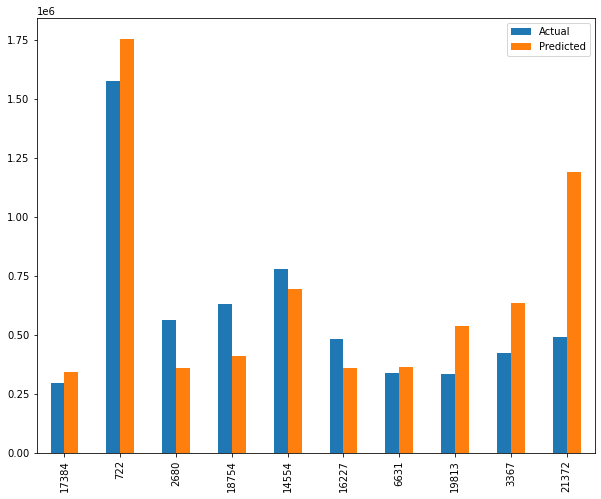

In [31]:
# Compare with Price targe
compare_df = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_hat)})
compare_df.head(10)

compare_df.head(10).plot(kind='bar',figsize=(10,8))
plt.show()

In [32]:
print("Error for Log Sale Price")
lr_mae = mean_absolute_error(y_test, y_hat)
lr_mse = mean_squared_error(y_test, y_hat)
lr_rmse = np.sqrt(lr_mse)
print(f'Mean Absolute Error: {lr_mae:.4f}')  
print(f'Mean Squared Error: {lr_mse:.4f}')  
print(f'Root Mean Squared Error:  {lr_rmse:.4f}')

print("\n")
print("Error for Sale Price")
lr_mae = mean_absolute_error(np.exp(y_test), np.exp(y_hat))
lr_mse = mean_squared_error(np.exp(y_test), np.exp(y_hat))
lr_rmse = np.sqrt(lr_mse)
print(f'Mean Absolute Error: {lr_mae:.4f}')  
print(f'Mean Squared Error: {lr_mse:.4f}')  
print(f'Root Mean Squared Error:  {lr_rmse:.4f}')

Error for Log Sale Price
Mean Absolute Error: 0.2740
Mean Squared Error: 0.1147
Root Mean Squared Error:  0.3387


Error for Sale Price
Mean Absolute Error: 142744.0715
Mean Squared Error: 46467848405.0257
Root Mean Squared Error:  215564.0239


In [33]:
cv_5_results = cross_val_score(lr, X, y, cv=5, scoring="neg_mean_squared_error")
print(f'Cross-validation Scores: {-cv_5_results}')
print( f'Mean RMSE CV=5: {np.mean(np.sqrt(-cv_5_results)):.4f} ')

Cross-validation Scores: [0.12569157 0.1218842  0.1203255  0.12365381 0.10575016]
Mean RMSE CV=5: 0.3455 


### Conclusion
In conclusion, we see with log transformed target:
MAE value: 0.2740
MSE value: 0.1147
RMSE value:  0.3387
Mean RMSE CV=5: 0.3455

which are close to 0.0 so our model has predicted close to true values.